# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
count = 0

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [22]:
cities

['jamestown',
 'hargeysa',
 'laramie',
 'bani walid',
 'punta arenas',
 'atuona',
 'la ronge',
 'ahipara',
 'areia branca',
 'puerto ayora',
 'hilo',
 'mount gambier',
 'waterloo',
 'busselton',
 'cabo san lucas',
 'hualmay',
 'qaanaaq',
 'la palma',
 'niamey',
 'turukhansk',
 'buchanan',
 'ormara',
 'illoqqortoormiut',
 'sao mateus',
 'ponta do sol',
 'carnarvon',
 'kapaa',
 'longyearbyen',
 'anda',
 'ushuaia',
 'lebu',
 'dingle',
 'taolanaro',
 'maceio',
 'haapiti',
 'huntingdon',
 'canico',
 'veraval',
 'gunnedah',
 'bambous virieux',
 'dhidhdhoo',
 'katsuura',
 'hithadhoo',
 'norman wells',
 'hermanus',
 'burica',
 'barentsburg',
 'arraial do cabo',
 'mys shmidta',
 'rikitea',
 'kuching',
 'baykit',
 'nuevitas',
 'cape town',
 'khatanga',
 'bluff',
 'mataura',
 'fergus',
 'vaini',
 'labuhan',
 'churapcha',
 'hami',
 'puerto escondido',
 'amos',
 'daru',
 'romitan',
 'hukuntsi',
 'chanika',
 'chernyshevskiy',
 'esperance',
 'raudeberg',
 'tasiilaq',
 'yuzhno-yeniseyskiy',
 'karkaral

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
cities_data = []
lats_data = []
longs_data = []
temps = []
clouds_data = []
hums = []
wind_speeds = []
dates = []
country_codes = []

#for loop for calling each city 
key = weather_api_key
unit = 'imperial'
for x in range (0, len(cities)):
    try:
        
        city_name = cities[x]
        final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
        data = requests.get(final_url).json()
        lat = data['coord']['lat']
        lats_data.append(lat)
        lng = data['coord']['lon']
        longs_data.append(lng)
        temp = data['main']['temp_max']
        temps.append(temp)
        clouds = data['clouds']['all']
        clouds_data.append(clouds)
        hum = data['main']['humidity']
        hums.append(hum)
        wind_speed = data['wind']['speed']
        wind_speeds.append(wind_speed)
        date = data['dt']
        dates.append(date)
        country = data['sys']['country']
        country_codes.append(country)
        print(f'Processing Record {x+1}: {city_name}')
        
        cities_data.append(city_name)
    except KeyError:
        print(f'City {city_name} not found, skipping.')
        continue

Processing Record 1: jamestown
Processing Record 2: hargeysa
Processing Record 3: laramie
Processing Record 4: bani walid
Processing Record 5: punta arenas
Processing Record 6: atuona
Processing Record 7: la ronge
Processing Record 8: ahipara
Processing Record 9: areia branca
Processing Record 10: puerto ayora
Processing Record 11: hilo
Processing Record 12: mount gambier
Processing Record 13: waterloo
Processing Record 14: busselton
Processing Record 15: cabo san lucas
Processing Record 16: hualmay
Processing Record 17: qaanaaq
Processing Record 18: la palma
Processing Record 19: niamey
Processing Record 20: turukhansk
Processing Record 21: buchanan
Processing Record 22: ormara
City illoqqortoormiut not found, skipping.
Processing Record 24: sao mateus
Processing Record 25: ponta do sol
Processing Record 26: carnarvon
Processing Record 27: kapaa
Processing Record 28: longyearbyen
Processing Record 29: anda
Processing Record 30: ushuaia
Processing Record 31: lebu
Processing Record 32: 

Processing Record 257: saint george
Processing Record 258: druzhnaya gorka
Processing Record 259: luderitz
Processing Record 260: fort morgan
Processing Record 261: motygino
City rungata not found, skipping.
Processing Record 263: vanavara
Processing Record 264: leh
Processing Record 265: povenets
Processing Record 266: markapur
Processing Record 267: gigmoto
Processing Record 268: endicott
Processing Record 269: tiksi
Processing Record 270: arman
Processing Record 271: dunedin
Processing Record 272: lagoa formosa
Processing Record 273: erzin
Processing Record 274: piripiri
Processing Record 275: kaeo
Processing Record 276: namatanai
Processing Record 277: kollam
Processing Record 278: pevek
City samusu not found, skipping.
City juifang not found, skipping.
Processing Record 281: lakes entrance
Processing Record 282: avarua
Processing Record 283: vao
Processing Record 284: lorengau
Processing Record 285: tekeli
Processing Record 286: seoul
Processing Record 287: kodiak
Processing Recor

Processing Record 511: saint-francois
Processing Record 512: fare
Processing Record 513: kirovskiy
Processing Record 514: eyl
Processing Record 515: kijang
Processing Record 516: plettenberg bay
Processing Record 517: barrhead
Processing Record 518: sabha
Processing Record 519: korla
Processing Record 520: simiti
Processing Record 521: yunhe
Processing Record 522: abnub
Processing Record 523: lodja
Processing Record 524: huangmei
Processing Record 525: kinsale
Processing Record 526: qax
Processing Record 527: torbay
Processing Record 528: mersing
Processing Record 529: cockburn town
Processing Record 530: san quintin
Processing Record 531: holland
City marcona not found, skipping.
Processing Record 533: wanning
Processing Record 534: kabo
Processing Record 535: palmas
Processing Record 536: evensk
Processing Record 537: cabedelo
Processing Record 538: borgarnes
Processing Record 539: poya
Processing Record 540: noyabrsk
Processing Record 541: the valley
Processing Record 542: taywarah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#dataframe
weather_data_df = pd.DataFrame({'city_name': cities_data,
                                'lat': lats_data,
                                'long': longs_data,
                                'max_temp': temps,
                                'cloudiness': clouds_data,
                                'humidity': hums,
                                'wind_speed': wind_speeds,
                                'country_code': country_codes,
                                'date_of_measurement': dates
                               })


weather_data_df

,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
0,jamestown,42.0970,-79.2353,32.00,90,100,8.05,US,1609895068
1,hargeysa,9.5600,44.0650,56.23,3,93,12.41,SO,1609894904
2,laramie,41.3114,-105.5911,25.00,90,85,20.80,US,1609895068
3,bani walid,31.7566,13.9942,50.04,65,42,5.82,LY,1609895068
4,punta arenas,-53.1500,-70.9167,55.40,99,58,6.93,CL,1609894986
...,...,...,...,...,...,...,...,...,...
568,aquiraz,-3.9014,-38.3911,80.60,40,83,9.17,BR,1609895112
569,te anau,-45.4167,167.7167,62.65,100,88,2.35,NZ,1609895112
570,varkaus,62.3153,27.8730,19.40,90,92,2.24,FI,1609895112
571,chico,39.7285,-121.8375,57.20,40,54,9.17,US,1609895112


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#max humidity value
weather_data_df['humidity'].max()

100

In [29]:
# save as csv
output_path = 'output/cities.csv'
weather_data_df.to_csv(output_path, index=False)
weather_data_df.sample(10)

,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
400,betafo,-19.8333,46.8500,62.26,99,87,1.77,MG,1609895096
434,kampong thum,12.7111,104.8887,74.80,52,70,9.22,KH,1609895099
532,sabang,5.8933,95.3214,81.50,100,82,21.43,ID,1609895109
561,jangipur,24.4667,88.0667,62.85,86,55,0.83,IN,1609895106
431,tucupita,9.0622,-62.0510,72.52,22,96,3.02,VE,1609895099
567,faya,18.3851,42.4509,57.20,0,93,1.68,SA,1609895112
207,xingyi,24.1877,102.8170,48.29,100,94,5.28,CN,1609895082
171,fortuna,40.5982,-124.1573,53.01,90,62,5.57,US,1609895080
321,san pedro,14.3500,121.0167,84.00,20,69,2.24,PH,1609894954
273,lompoc,34.6391,-120.4579,60.80,1,63,10.29,US,1609895087


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

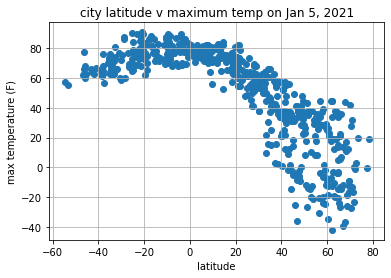

In [40]:
x_axis1 = weather_data_df['lat']
y_axis1 = weather_data_df['max_temp']
plt.title('city latitude v maximum temp on Jan 5, 2021')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1, y_axis1)
plt.savefig('output/tempLat', bbox_inches='tight')
plt.show()

This scatter plot is showing that the temperture gets warmer as you get closer to the equater and it gets even hotter between the -30 and 0 latitude line. 

## Latitude vs. Humidity Plot

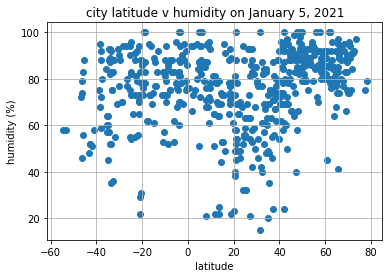

In [44]:
x_axis2 = weather_data_df['lat']
y_axis2 = weather_data_df['humidity']
plt.title('city latitude v humidity on January 5, 2021')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2, y_axis2)
plt.savefig('output/humLat.png', bbox_inches='tight')
plt.show()

This scatter plot shows that the humidity percentage is high on both sides of the equator. There is not a clear correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

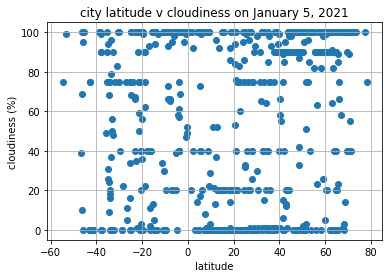

In [46]:
x_axis3 = weather_data_df['lat']
y_axis3 = weather_data_df['cloudiness']
plt.title('city latitude v cloudiness on January 5, 2021')
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.grid()
plt.scatter(x_axis3, y_axis3)
plt.savefig('output/cloudLat.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

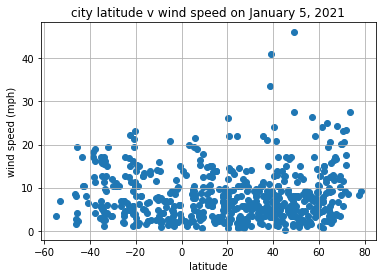

In [48]:
x_axis4 = weather_data_df['lat']
y_axis4 = weather_data_df['wind_speed']
plt.title('city latitude v wind speed on January 5, 2021')
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.grid()
plt.scatter(x_axis4, y_axis4)
plt.savefig('output/windLat.png', bbox_inches='tight')
plt.show()

## Linear Regression

In [55]:
#north hemisphere
northern_hem_data_df = weather_data_df[weather_data_df['lat'] > 0]

#south hemisphere
southern_hem_data_df = weather_data_df[weather_data_df['lat'] < 0]


,city_name,lat,long,max_temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
235,broken hill,-31.9500,141.4333,66.20,75,55,19.46,AU,1609895084
43,arraial do cabo,-22.9661,-42.0278,75.81,66,91,16.78,BR,1609894811
203,samarai,-10.6167,150.6667,85.95,30,73,14.18,PG,1609895082
48,cape town,-33.9258,18.4232,68.00,20,82,17.22,ZA,1609894916
319,karratha,-20.7377,116.8463,90.82,0,29,21.32,AU,1609894500


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression